## Check nvidia connection and details

In [1]:
!nvidia-smi

Sun May 21 17:04:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Install ultralytics (yolo v8)

In [3]:
!pip install ultralytics==8.0.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.4 MB/s eta 0:00:00


In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


## Import Ultralytics

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

# Custome Training

## Mount google drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Set working directory

In [7]:
%cd /content/drive/MyDrive/AI-ML/yolov8-Football-Data

/content/drive/MyDrive/AI-ML/yolov8-Football-Data


## Train model (yolov8s)

In [14]:
import torch
torch.cuda.empty_cache()

print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |
|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |

# Parameter to train model

https://docs.ultralytics.com/usage/cfg/#train

In [20]:
%cd /content/drive/MyDrive/AI-ML/yolov8-Football-Data

!yolo task=detect mode=train model=yolov8s.pt data=Football-Data.yaml epochs=20 imgsz=1920 plots=true save=True batch=4

/content/drive/MyDrive/AI-ML/yolov8-Football-Data
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=Football-Data.yaml, epochs=20, patience=50, batch=4, imgsz=1920, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int

## Training Report

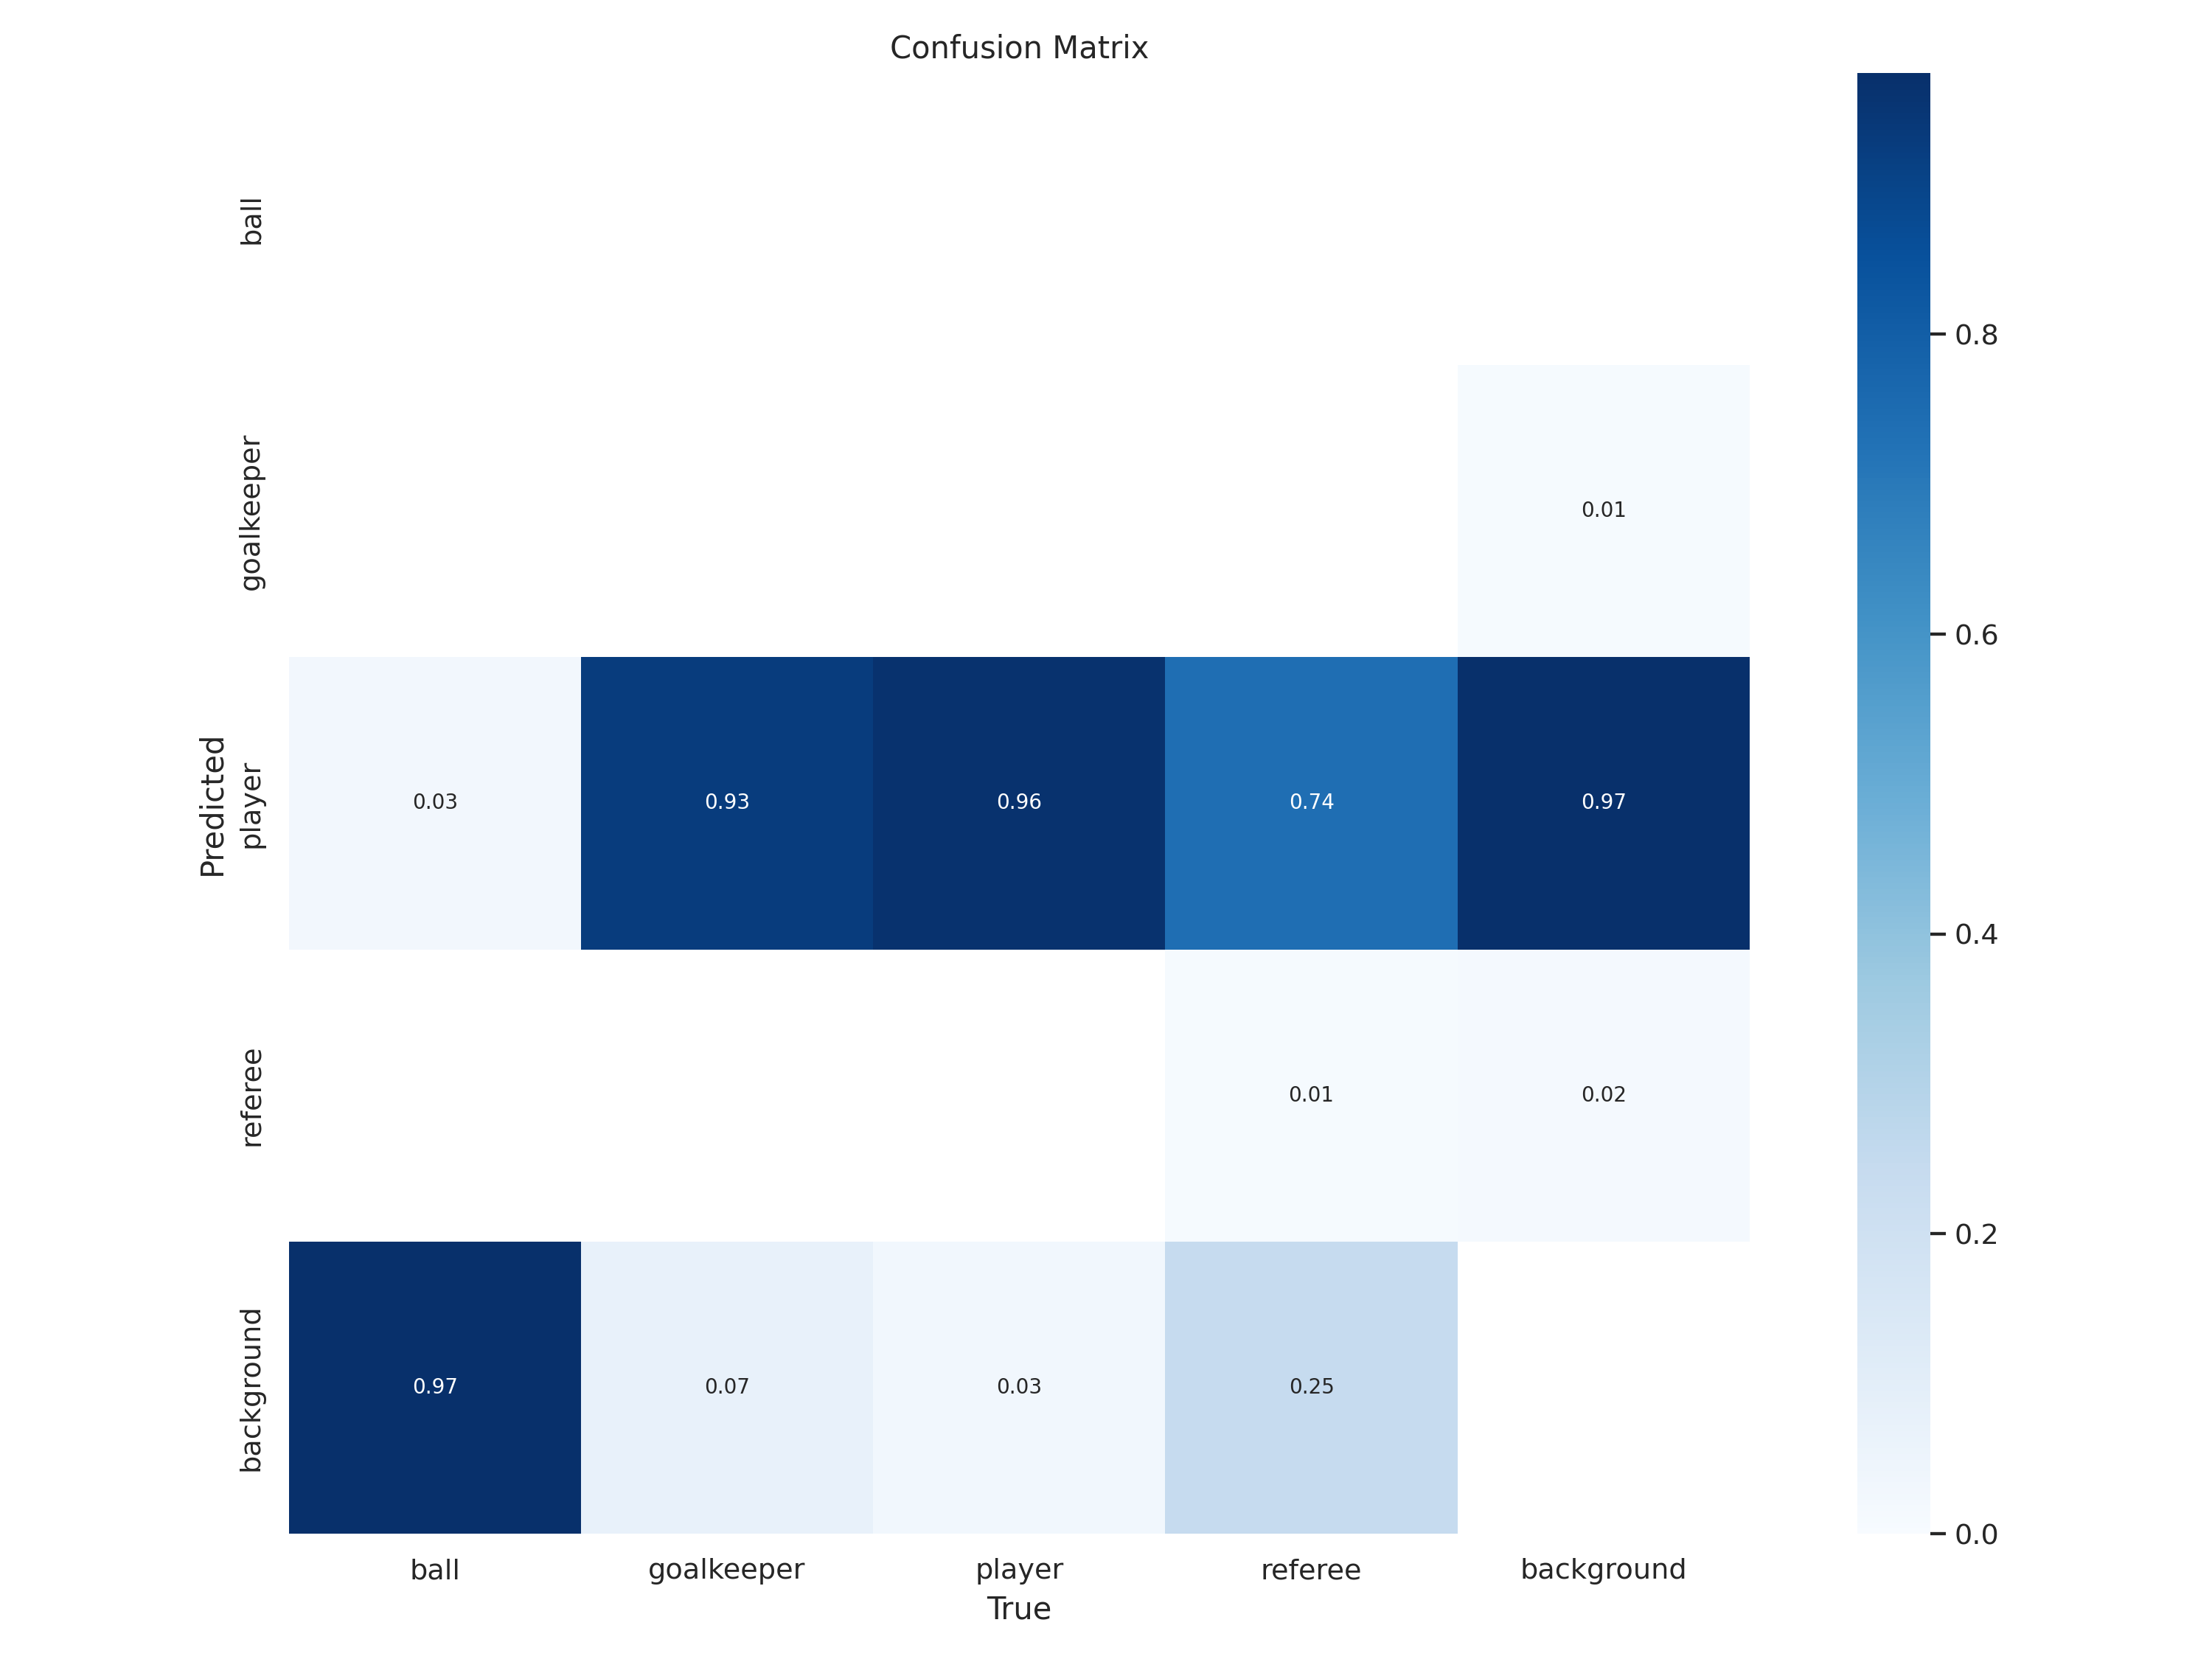

In [21]:
Image(filename='/content/drive/MyDrive/AI-ML/yolov8-Football-Data/runs/detect/train/confusion_matrix.png')

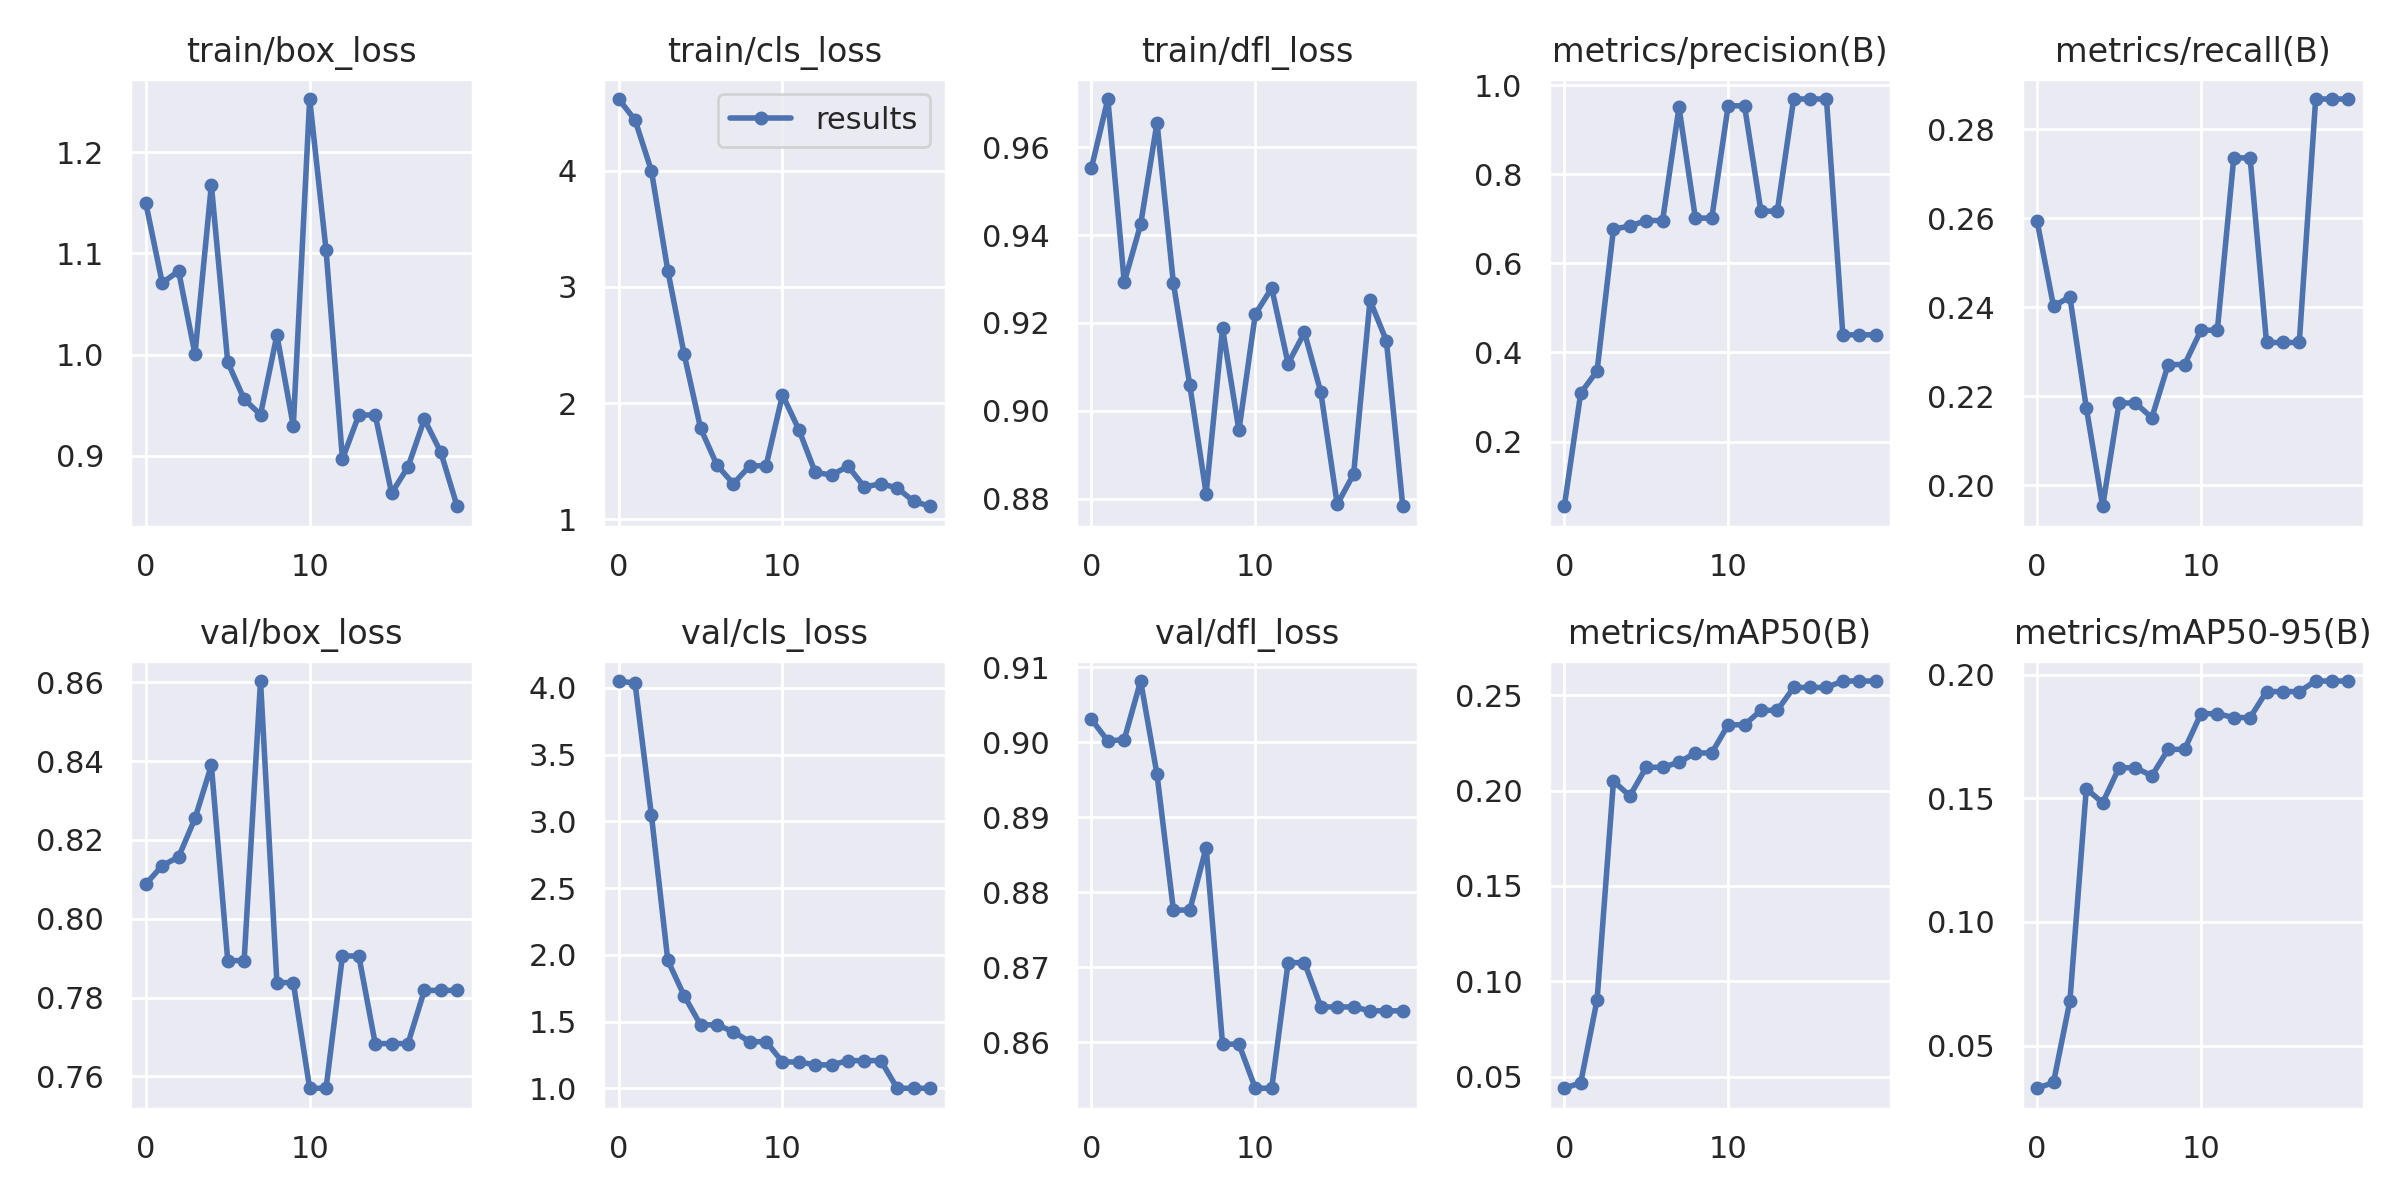

In [22]:
Image(filename='/content/drive/MyDrive/AI-ML/yolov8-Football-Data/runs/detect/train/results.png')

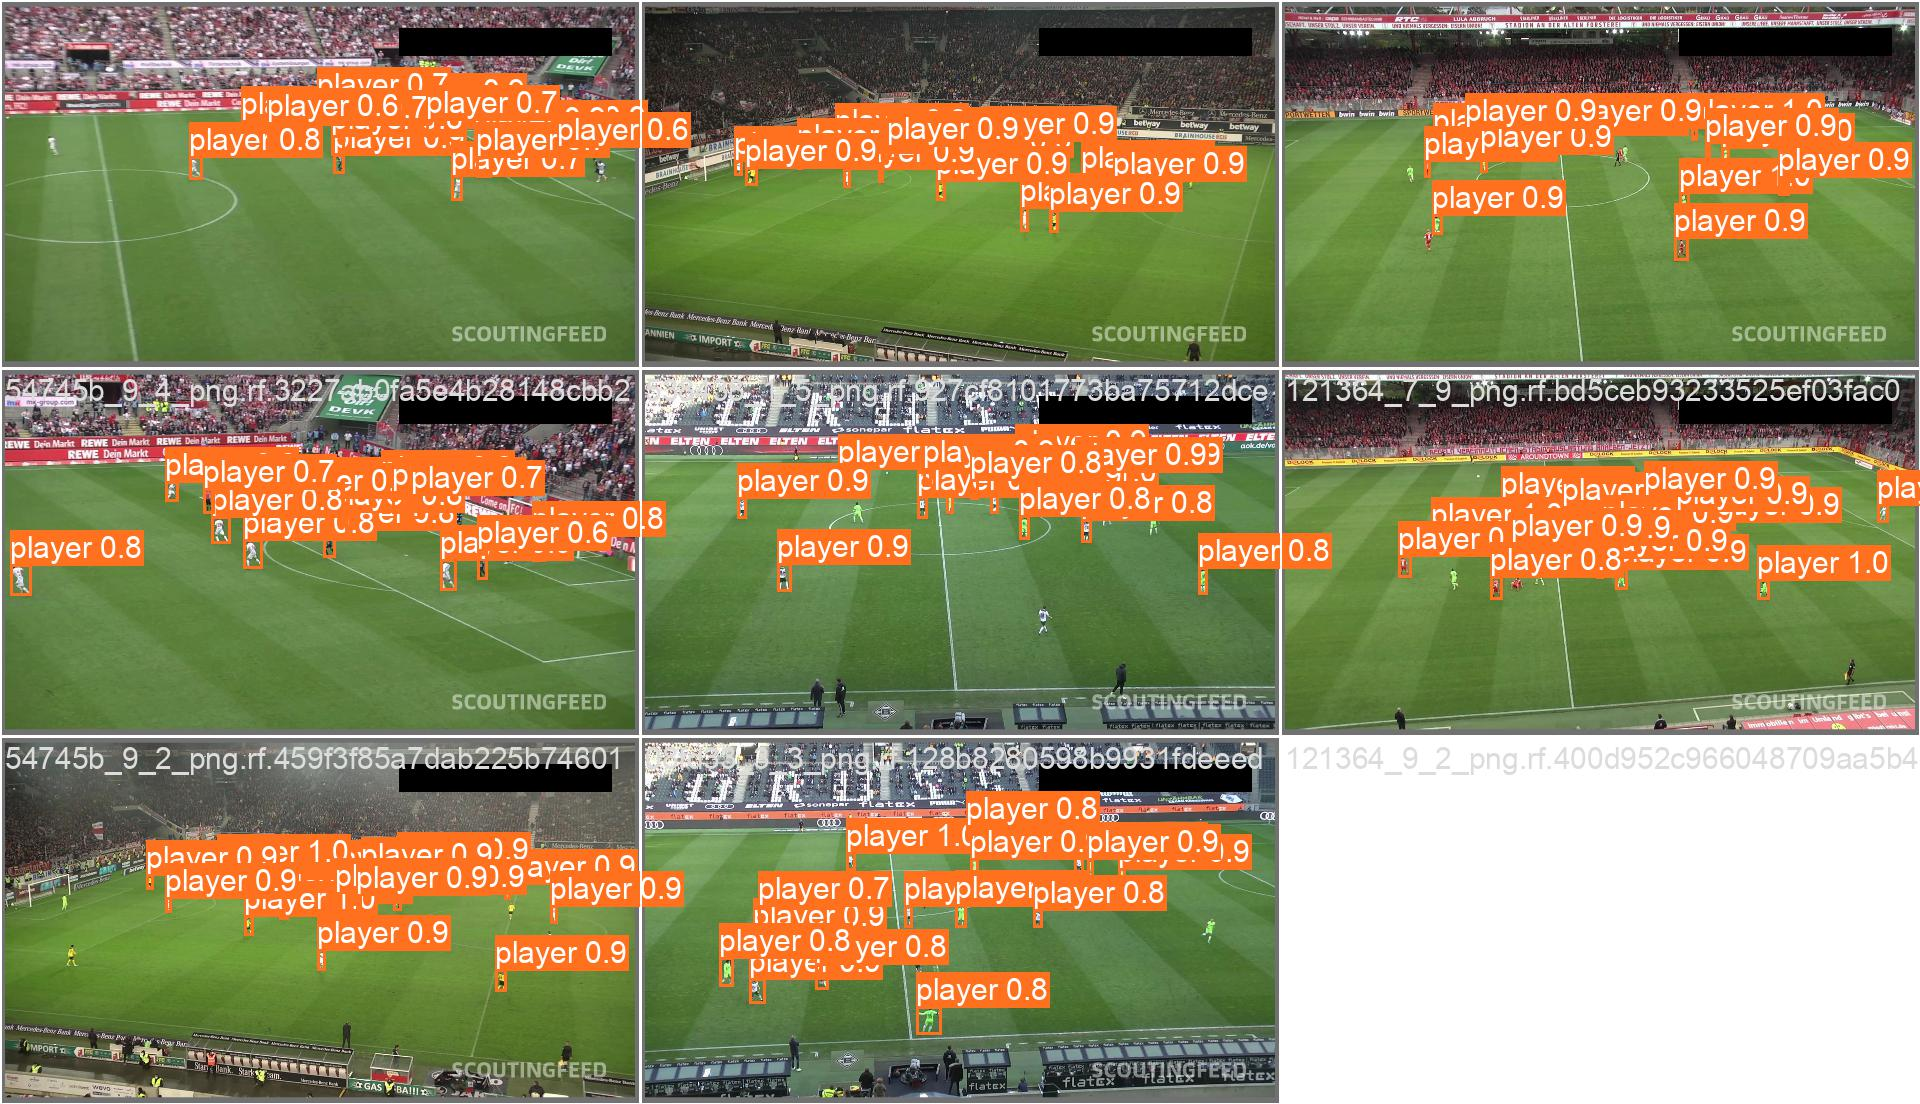

In [25]:
Image(filename='/content/drive/MyDrive/AI-ML/yolov8-Football-Data/runs/detect/train/val_batch2_pred.jpg')

## Validate Custome Model

In [26]:
%cd /content/drive/MyDrive/AI-ML/yolov8-Football-Data

!yolo task=detect mode=val model=/content/drive/MyDrive/AI-ML/yolov8-Football-Data/runs/detect/train/weights/best.pt data=Football-Data.yaml save=True batch=4

/content/drive/MyDrive/AI-ML/yolov8-Football-Data
2023-05-21 18:01:29.448623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 18:01:30.728160: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/AI-ML/yolov8-Football-Data/Data/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:06<00:00,  1.52it/s]
                   all         38        905      0.442       0.

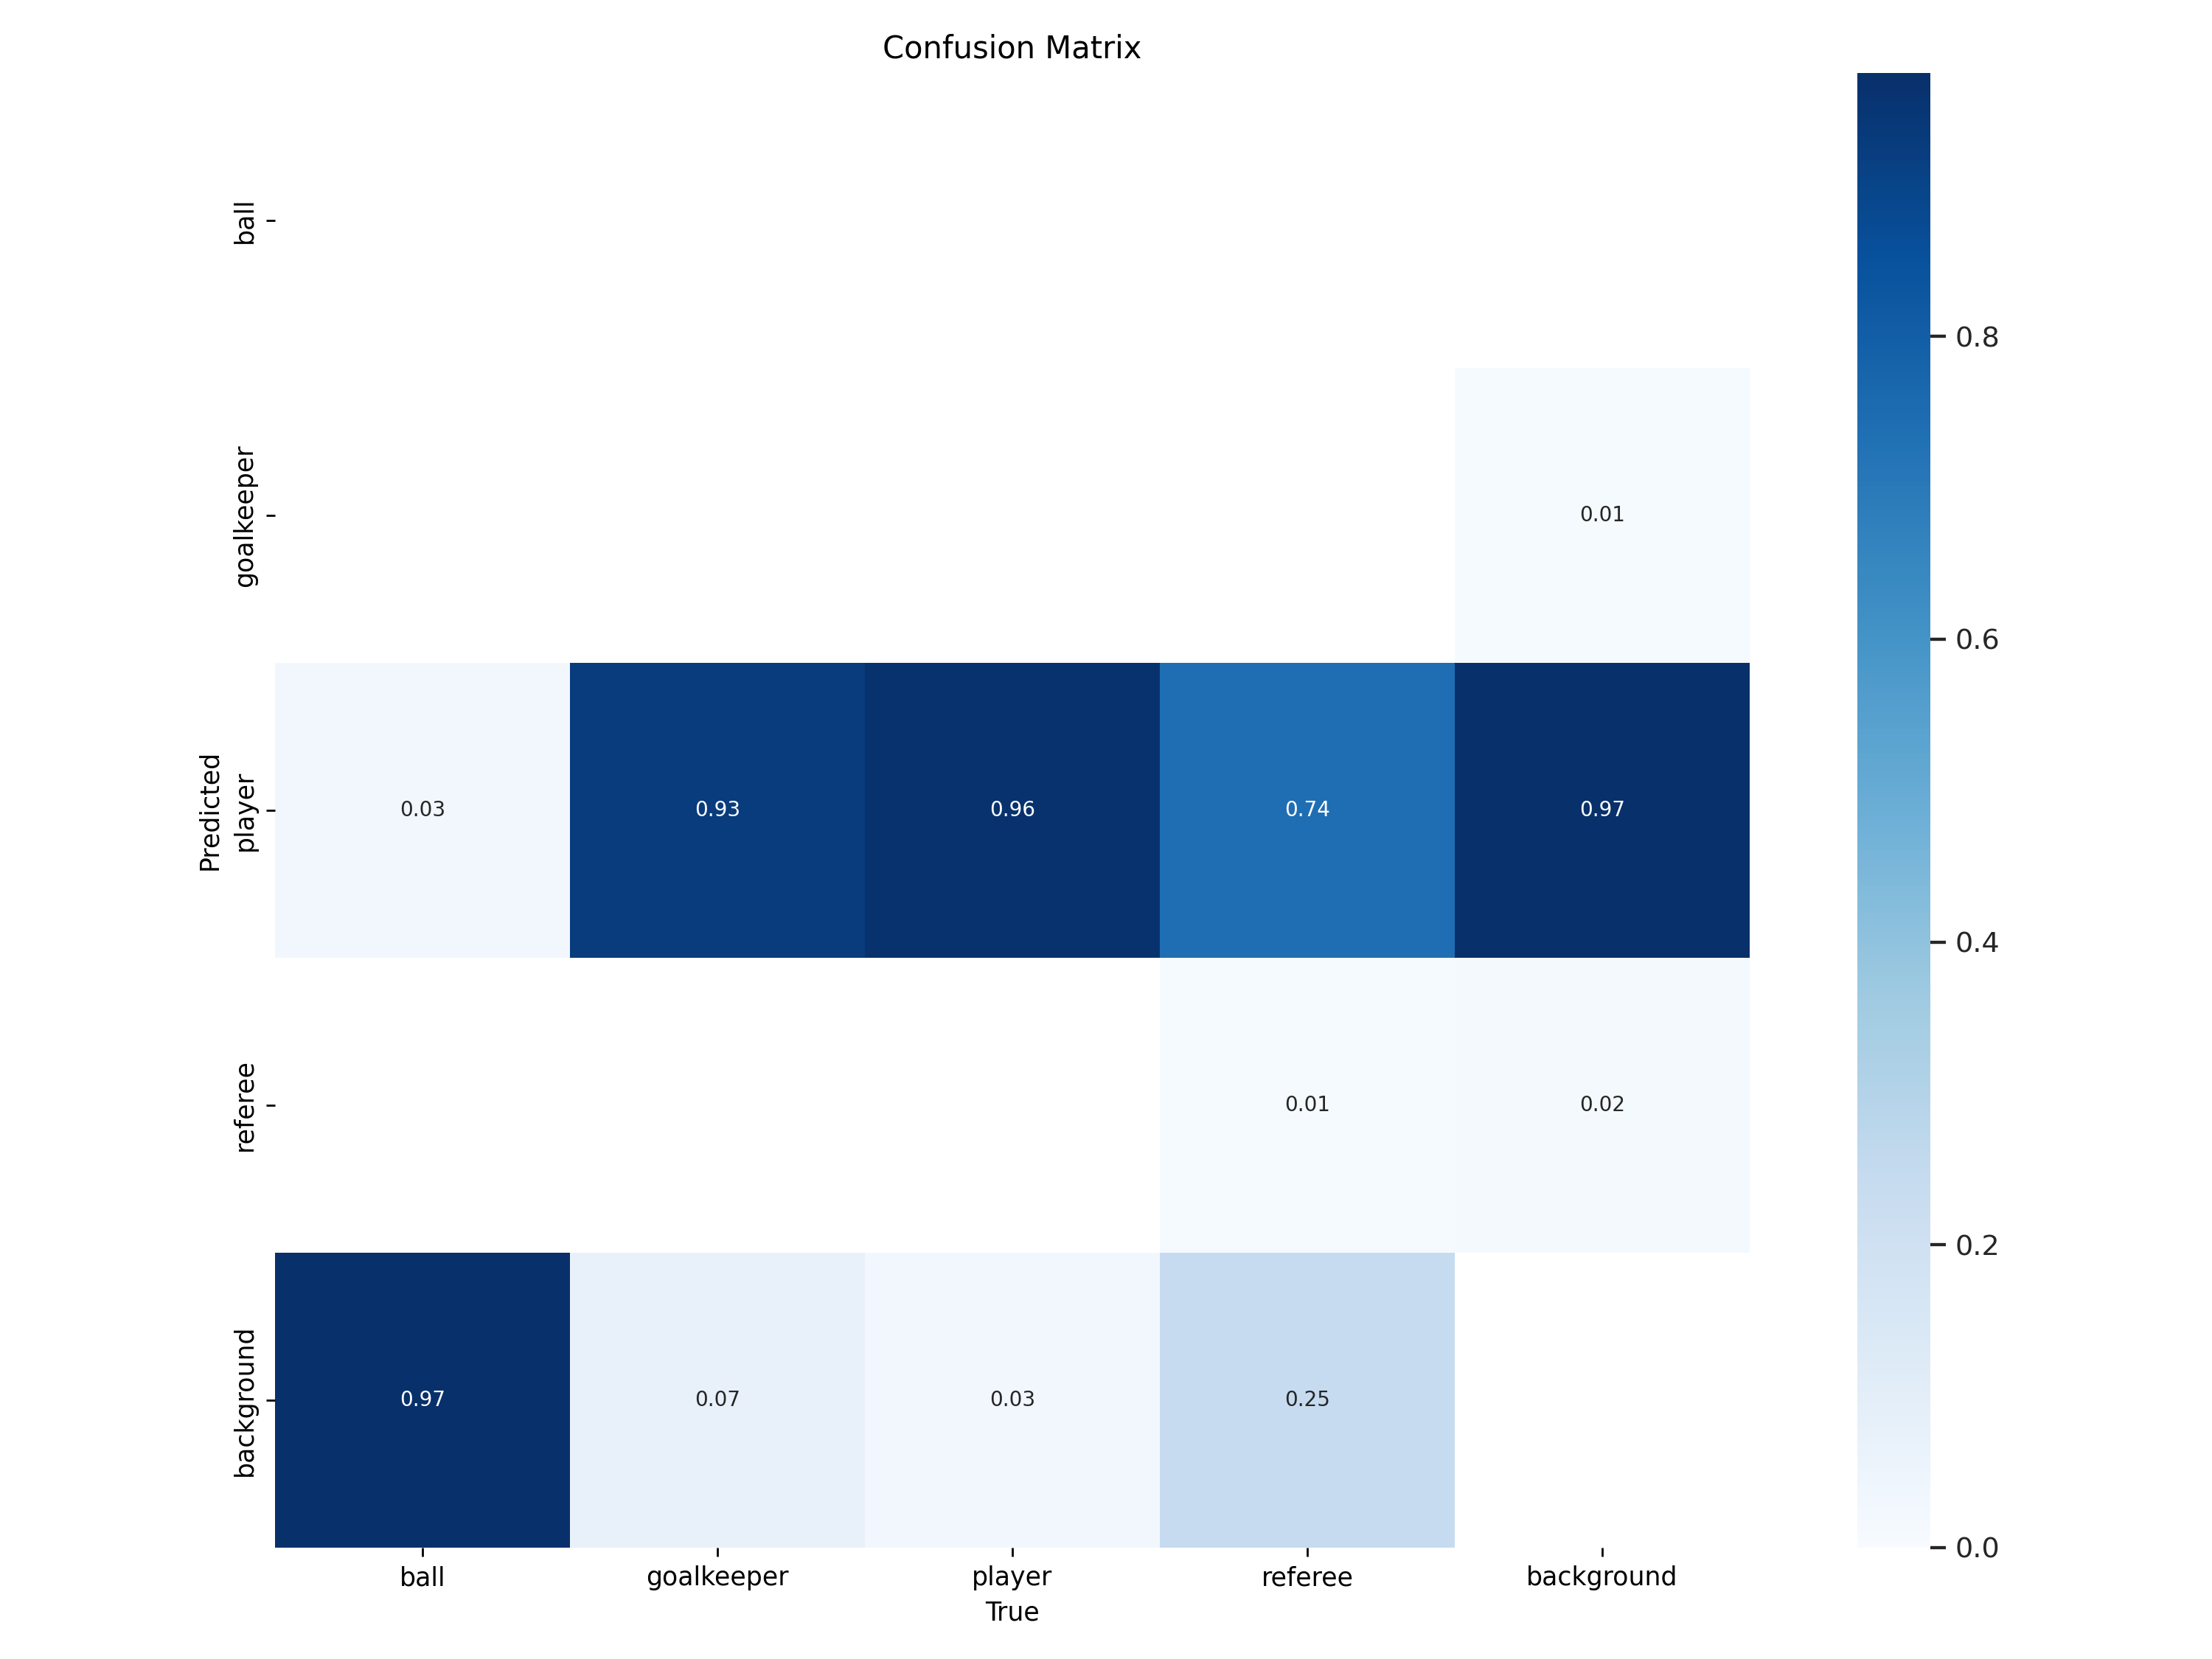

In [28]:
Image(filename='/content/drive/MyDrive/AI-ML/yolov8-Football-Data/runs/detect/val/confusion_matrix.png')

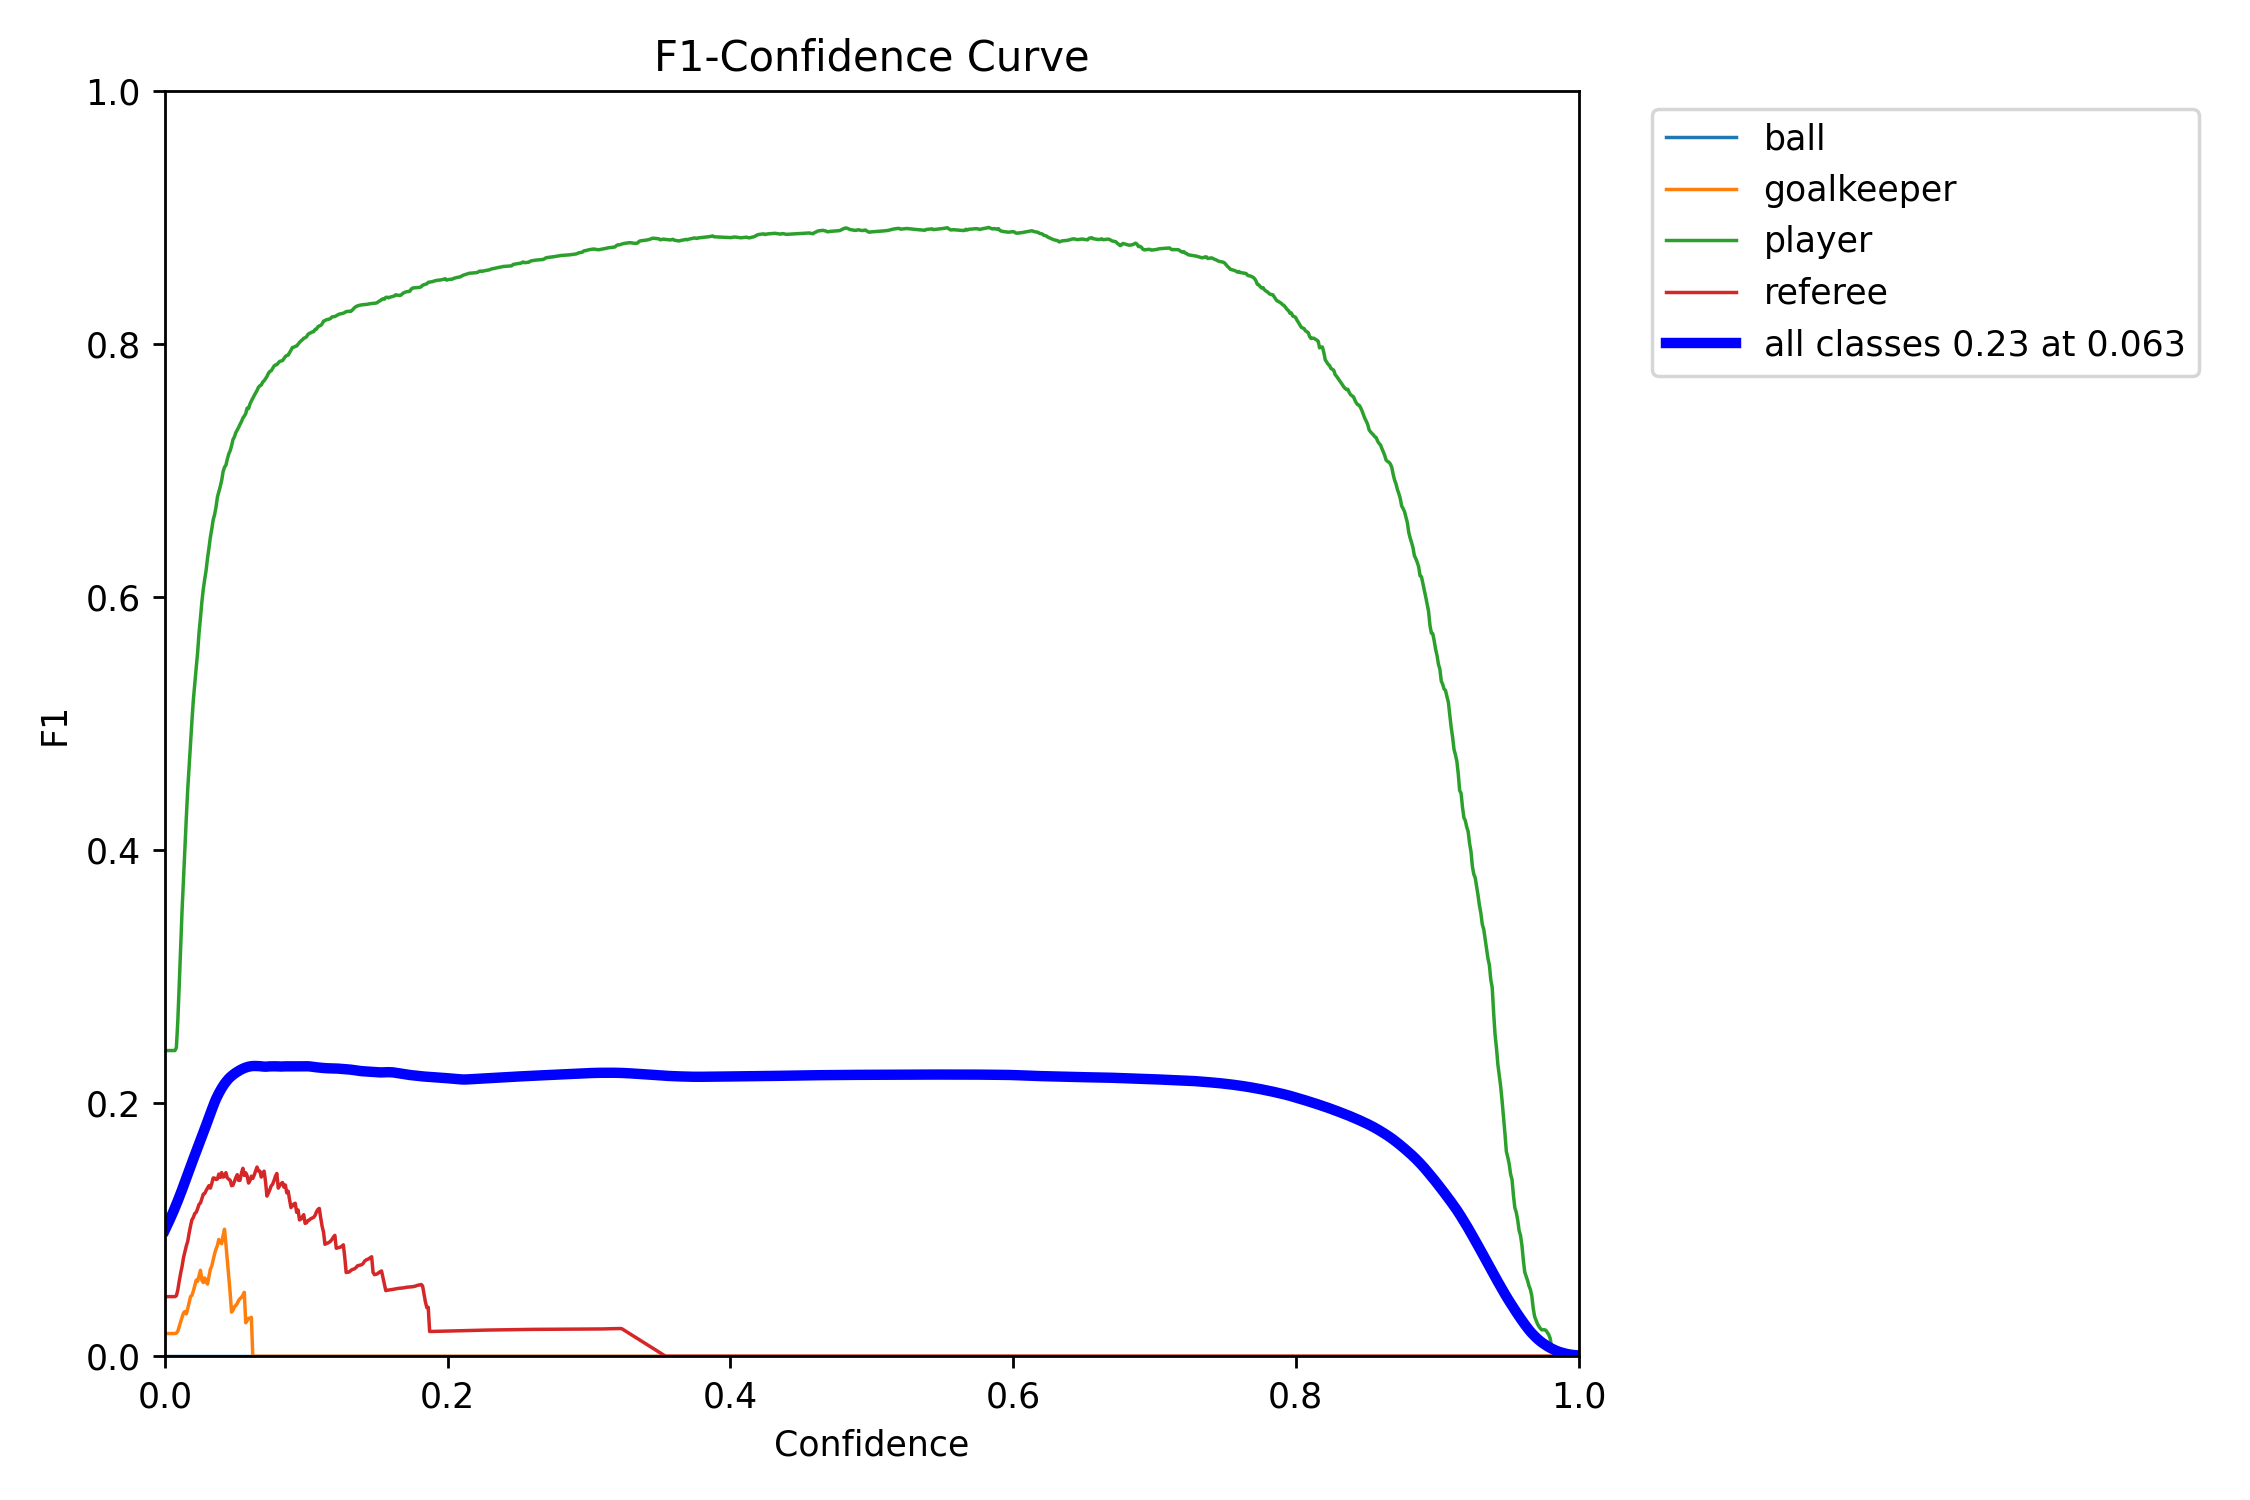

In [29]:
Image(filename='/content/drive/MyDrive/AI-ML/yolov8-Football-Data/runs/detect/val/F1_curve.png')

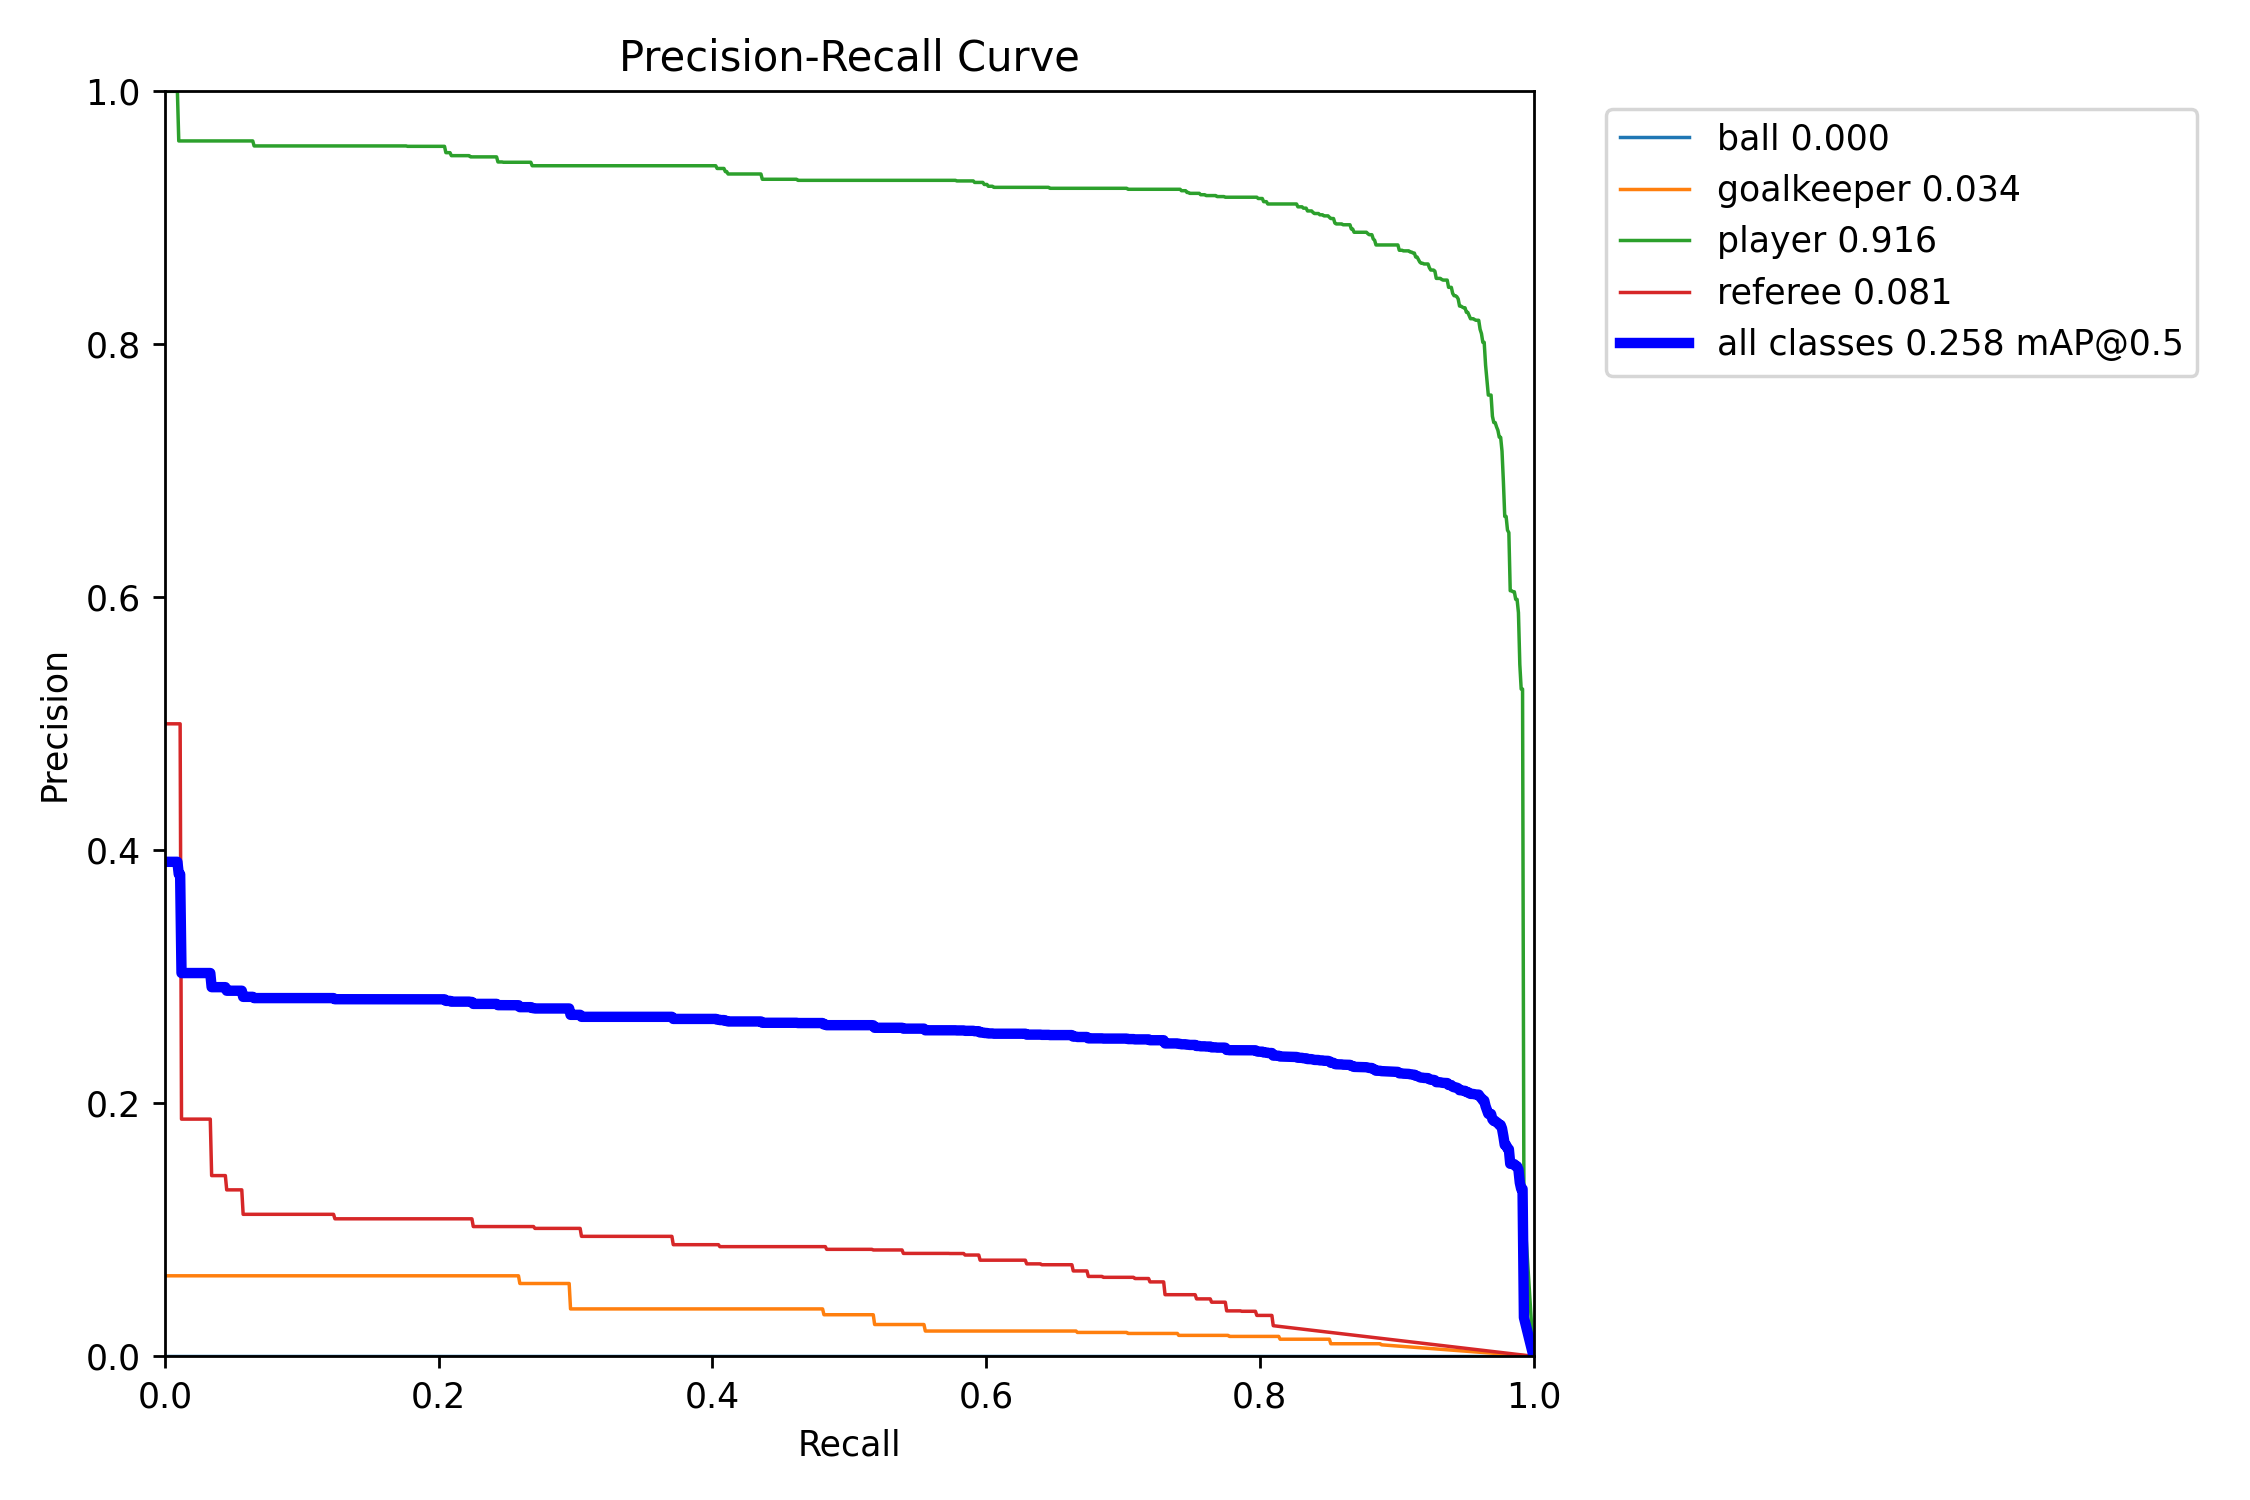

In [30]:
Image(filename='/content/drive/MyDrive/AI-ML/yolov8-Football-Data/runs/detect/val/PR_curve.png')

#Inference with Custom Model

In [31]:
%cd /content/drive/MyDrive/AI-ML/yolov8-Football-Data

!yolo task=detect mode=predict model=/content/drive/MyDrive/AI-ML/yolov8-Football-Data/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/AI-ML/yolov8-Football-Data/Data/test/images save=True batch=4

/content/drive/MyDrive/AI-ML/yolov8-Football-Data
2023-05-21 18:09:01.733487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 18:09:02.616260: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/13 /content/drive/MyDrive/AI-ML/yolov8-Football-Data/Data/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 1088x1920 26 players, 59.8ms
image 2/13 /content/drive/MyDrive/AI-ML/yolov8-Football-Data/Data/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 1088x1920 26 players, 47.2ms
image 3/13 /content/

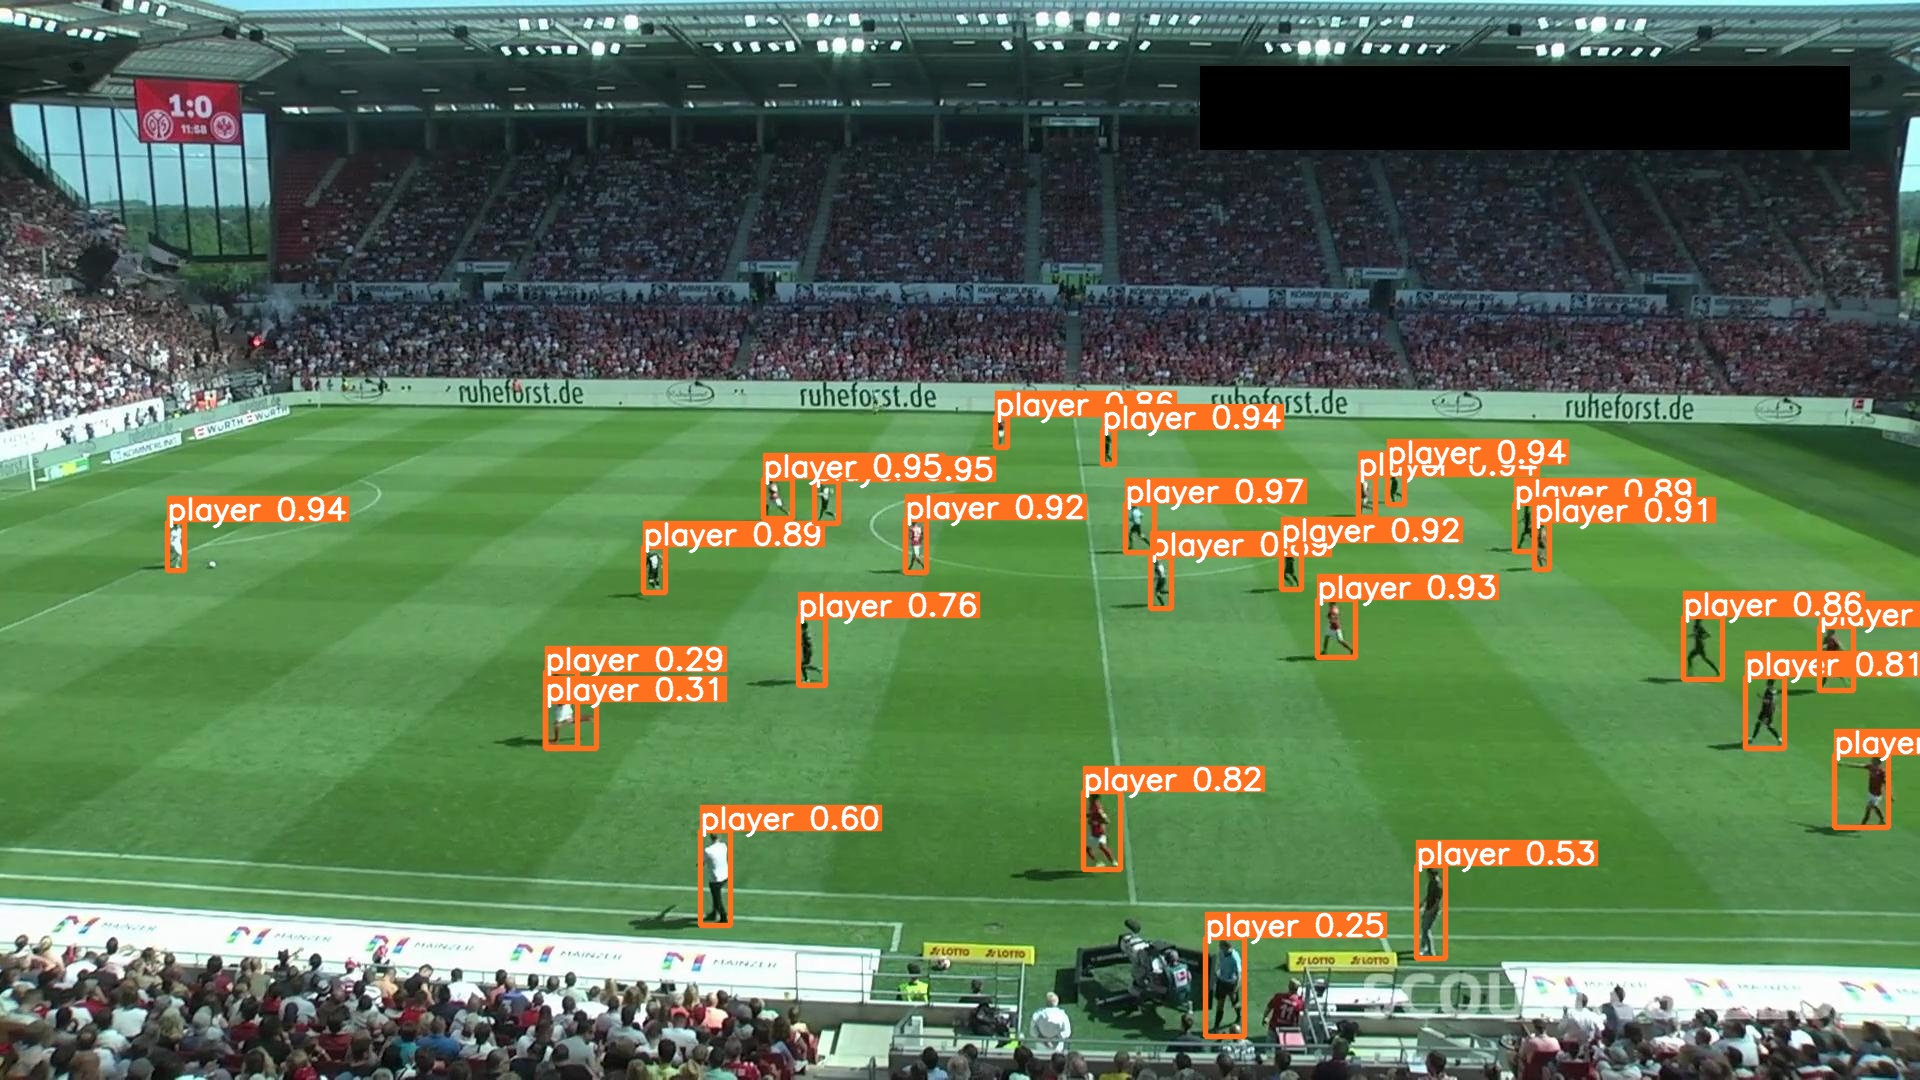

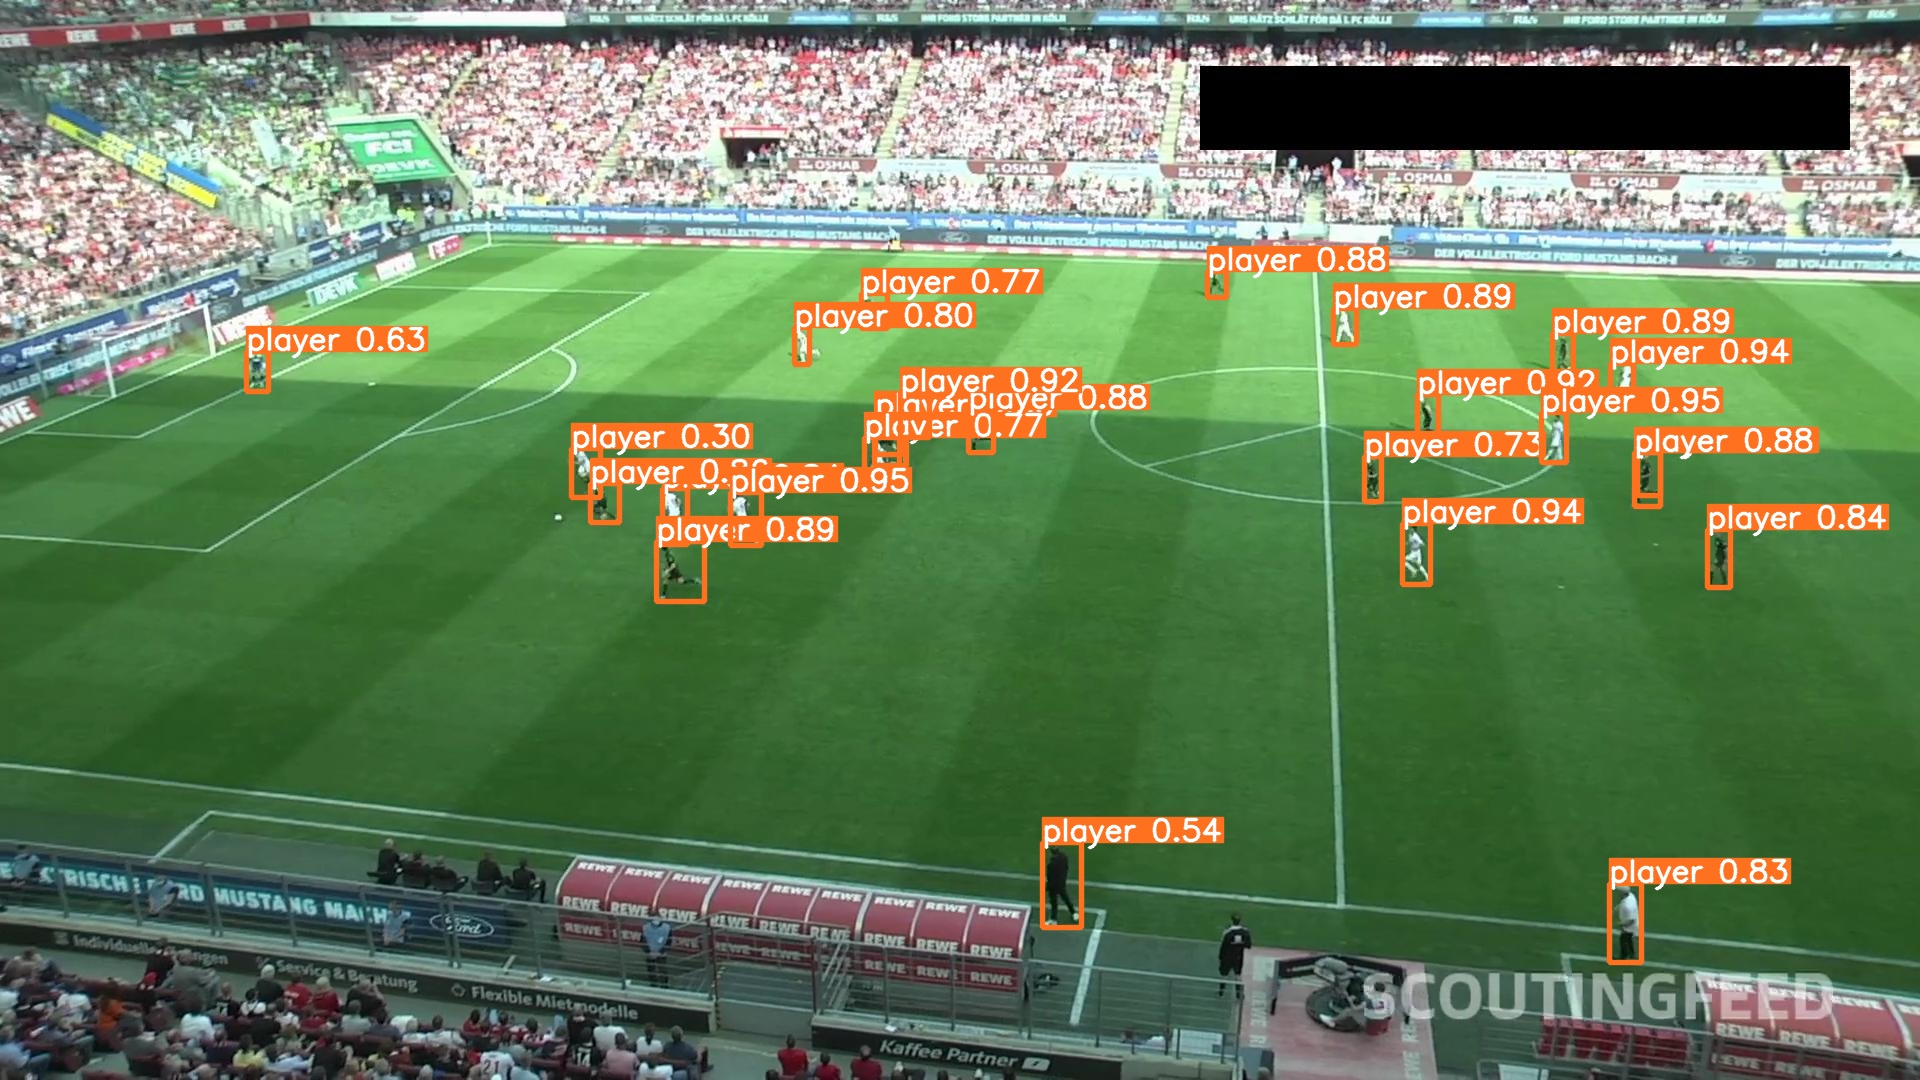

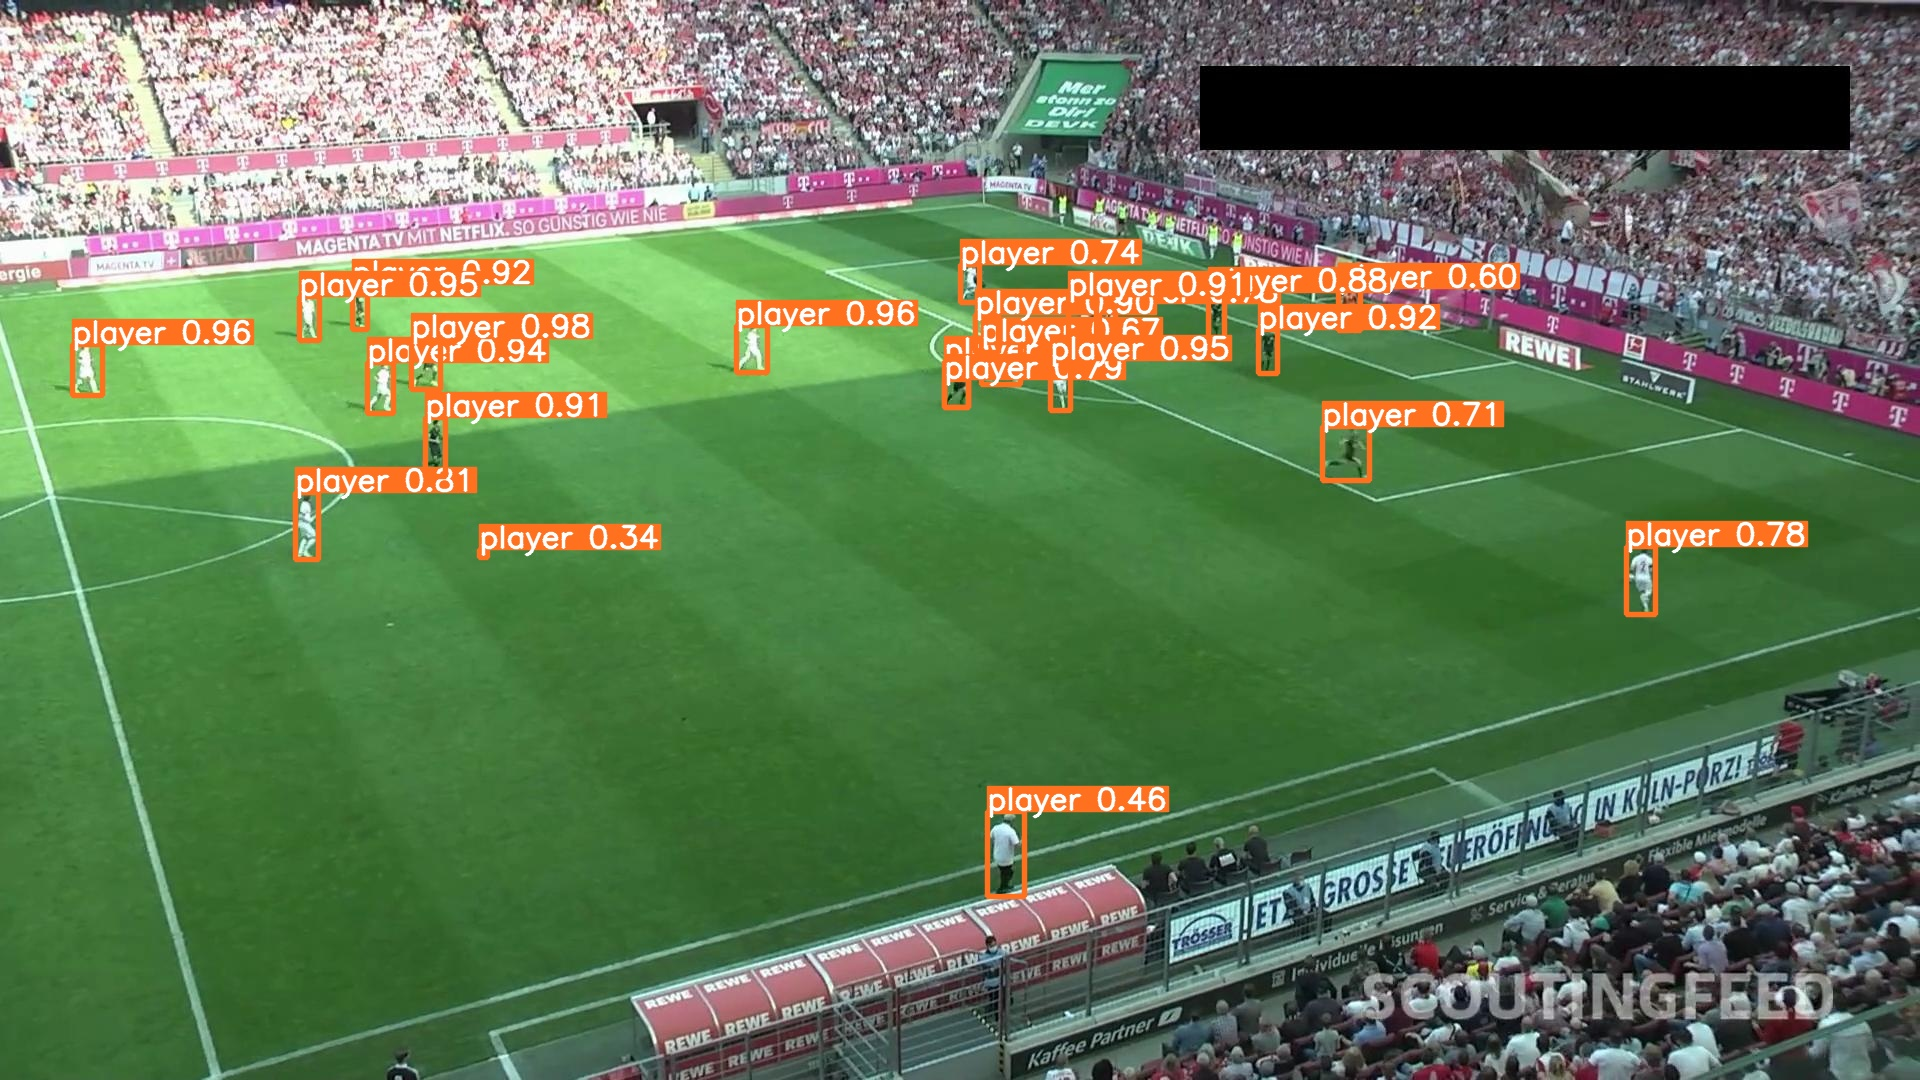

In [32]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")